# **Project owner : Happy Mekiah**
Alpha Dreamers Banking Consortium (ADBC) is facing a high rate of personal loan defaults. This is impacting their profitability and requires immediate attention.

Solution: We propose a data-driven approach to address this challenge. This project will leverage Business Intelligence (BI) and machine learning techniques to:

Analyze and visualize data: Explore loan applicant data to identify patterns and trends associated with loan defaults.
Clean and prepare data: Ensure data quality by addressing missing values, inconsistencies, and formatting issues.
Develop a machine learning model: Build a logistic regression model to predict the likelihood of a loan applicant defaulting on a personal loan.
Expected Benefits:

Reduced default rates: The model will help ADBC assess loan applications more effectively, allowing them to approve loans with a lower risk of default.
Improved profitability: By minimizing defaults, ADBC can improve their financial standing and profitability.
Data-driven decision making: The project will establish a data-driven framework to support informed decision making regarding personal loan approvals.
This project will be conducted in three phases:

Task 1: Exploratory Data Analysis (EDA): We will analyze loan applicant data using visualization techniques to understand factors correlated with loan defaults.
Task 2: Data Cleaning: Data will be cleaned and prepared to ensure its suitability for machine learning model development.
Task 3: Machine Learning Model Development: A logistic regression model will be built to predict loan defaults based on applicant data.



In [3]:
!pip install numpy
!pip install scipy
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# **Dataset loading**

In [4]:
bankdata= pd.read_csv('/content/CSEdata.csv')

After loading a dataset i have to check the first few rows of the dataset to check whether it has been loaded correctly

In [5]:
bankdata.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


Now lets check the last few rows of the data set

In [6]:
bankdata.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


Now lets check the number of entries, datatype of each column and memory usage. We have now seen the composition of iur dataset so now lets check the descriptive statistics

In [ ]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Below are the descrpitive statistics of our dataset

In [7]:
bankdata.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [8]:
bankdata

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


# **Data cleaning**
Lets clean our dataset to see if it contains nan values

In [ ]:
bankdata.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Our dataset does not have any nan values,now lets see the unique values in the riskflag column since its our target variable

In [ ]:
bankdata['Risk_Flag'].nunique()

2

Risk flag has 2 unique values

In [ ]:
bankdata['Risk_Flag'].mean()

0.123

# **Exploratory data analysis**
Lets explore our variables to check the relationships between them. Lets start by distributing some of them to check their count.

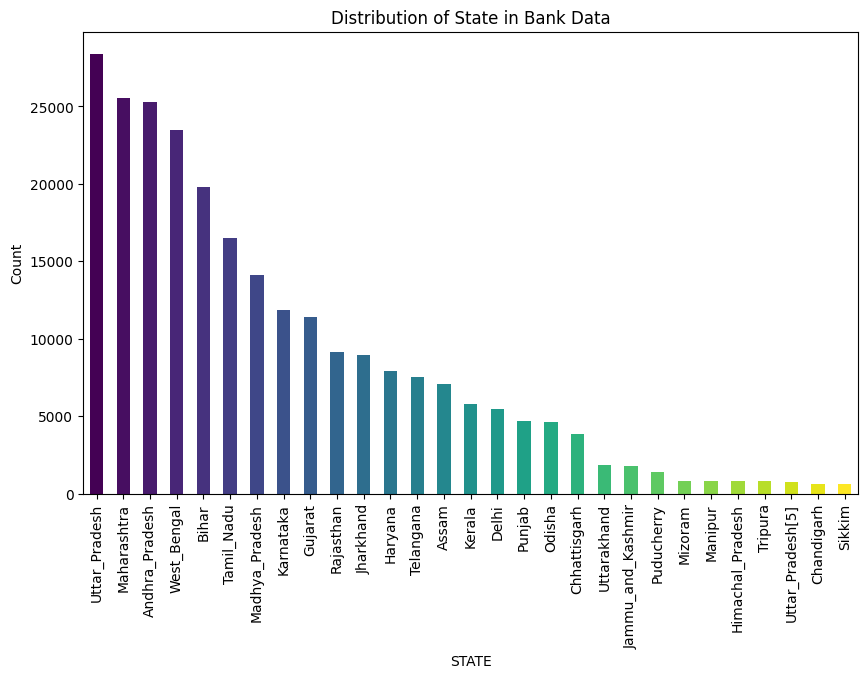

In [9]:
#state distribution
state_distribution = bankdata['STATE'].value_counts()

# Create a color palette with a color for each state
colors = plt.cm.viridis(np.linspace(0, 1, len(state_distribution)))

# Create a bar graph
plt.figure(figsize=(10,6))
state_distribution.plot(kind='bar', color=colors)
plt.title('Distribution of State in Bank Data')
plt.xlabel('STATE')
plt.ylabel('Count')
plt.show()


By distributing the states I found out that Uttar_pradesh has many people in our data base and the one with few people is Sikkim. Now lets distribute professions

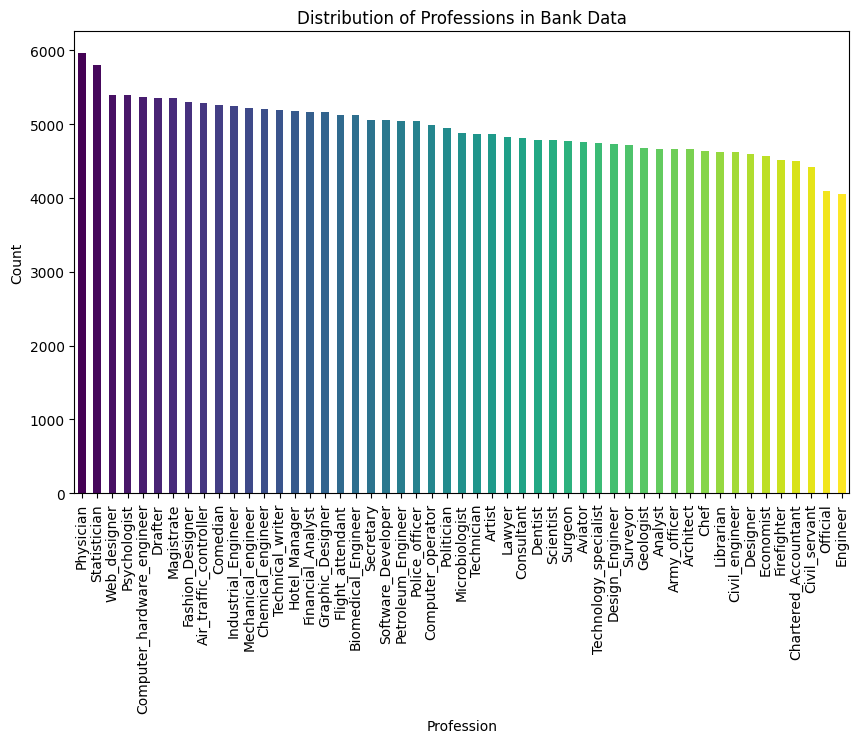

In [10]:
state_distribution = bankdata['Profession'].value_counts()

# Create a color palette with a color for each state
colors = plt.cm.viridis(np.linspace(0, 1, len(state_distribution)))

# Create a bar graph
plt.figure(figsize=(10,6))
state_distribution.plot(kind='bar', color=colors)
plt.title('Distribution of Professions in Bank Data')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.show()

By distributing the professions I discovered that there are many physicians and the least profession is Engineers, now lets check the top ten paying professions

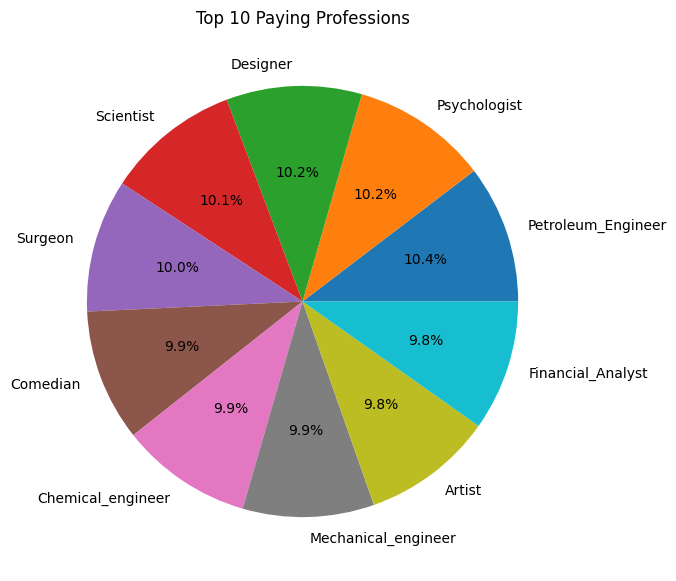

In [11]:
import matplotlib.pyplot as plt

top_professions = bankdata.groupby('Profession')['Income'].mean().nlargest(10)

# Plotting
plt.figure(figsize=(10,7))
plt.pie(top_professions, labels = top_professions.index, autopct='%1.1f%%')
plt.title("Top 10 Paying Professions")
plt.show()

I dicovered that the top ten paying professions are: Chemical engineer, Comedian, Surgeon, Mechanical engineer, Artist, Financial analyst, Petroleum engineer, Psychologist,Designer and Scientist professions. Now lets check the relationship between Age and Income

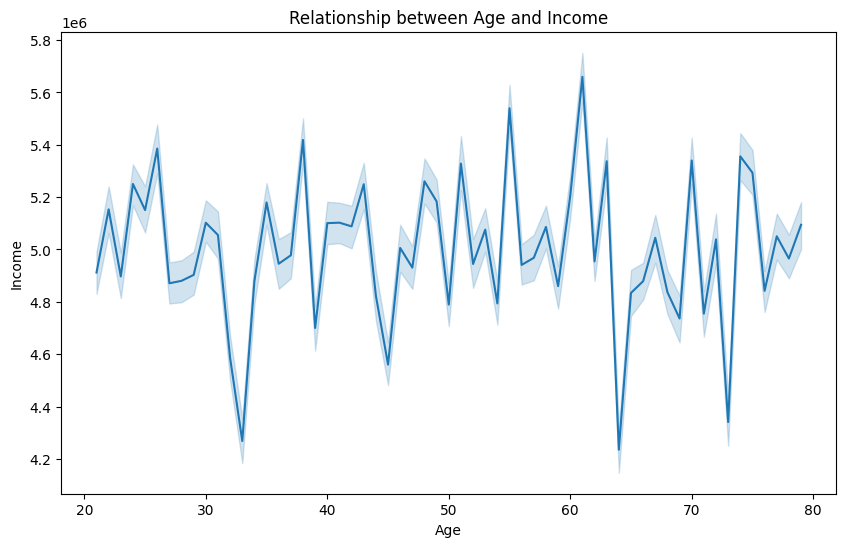

In [12]:
import seaborn as sns
bankdata = pd.read_csv('/content/CSEdata.csv')
# Is there a relationship between Income and Age
plt.figure(figsize=(10,6))
sns.lineplot(x='Age', y='Income', data=bankdata)
plt.title('Relationship between Age and Income')
plt.show()

In checking the relationship I discovered that age has an impact on income because the older the person the more income, now lets check age and risk flag

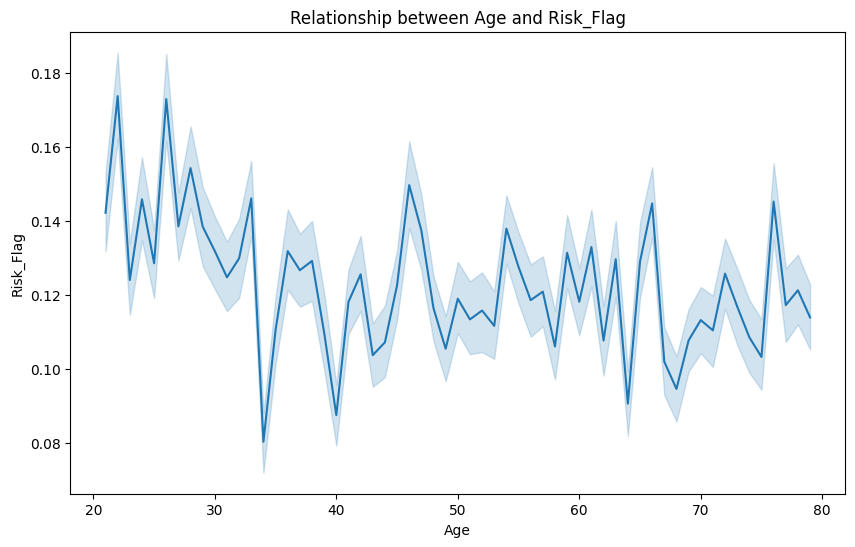

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
bankdata = pd.read_csv("/content/CSEdata.csv")

# plot a graph'
plt.figure(figsize=(10,6))
sns.lineplot(x='Age', y='Risk_Flag', data=bankdata)
plt.title('Relationship between Age and Risk_Flag')
plt.show()

Age has an impact on riskflag because the older the person the lower the risk flag . Now let check experience and income

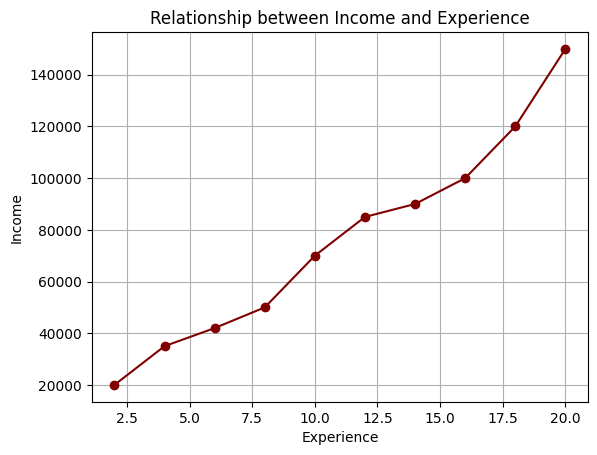

In [14]:
#is there a relationship between experience and income
data = {'Experience': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
        'Income': [20000, 35000, 42000, 50000, 70000, 85000, 90000, 100000, 120000, 150000]}
bankdata = pd.DataFrame(data)

# Filter data for income between the specified range
filtered_bankdata = bankdata[(bankdata['Income'] >= 10310) & (bankdata['Income'] <= 9999938)]

# Sort DataFrame based on 'Experience'
filtered_bankdata.sort_values('Experience', inplace=True)

# Create the line graph
plt.plot(filtered_bankdata['Experience'], filtered_bankdata['Income'], color='maroon', marker='o', linestyle='-')

plt.xlabel("Experience")
plt.ylabel("Income")
plt.title("Relationship between Income and Experience")
plt.grid(True)  # Add gridlines for better readability
plt.show()

According to the graph Experience also has an impact on Income because the higher the experience the higher the Income, now lets check the house ownership versus Marital status

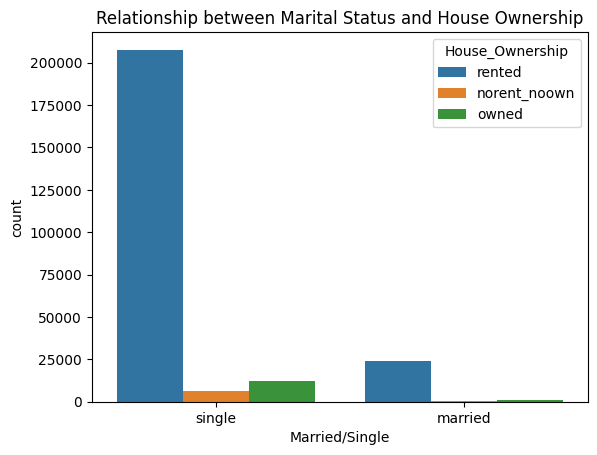

In [15]:
bankdata = pd.read_csv('/content/CSEdata.csv')

# Replace 'Marital_Status' and 'House_Ownership' with your actual column names
sns.countplot(x='Married/Single', hue='House_Ownership', data=bankdata)

plt.title('Relationship between Marital Status and House Ownership')
plt.show()



Acoording to the graph there are many people who are single and are renting houses and the married one's are only few who are renting. Now lets check profession versus riskflag

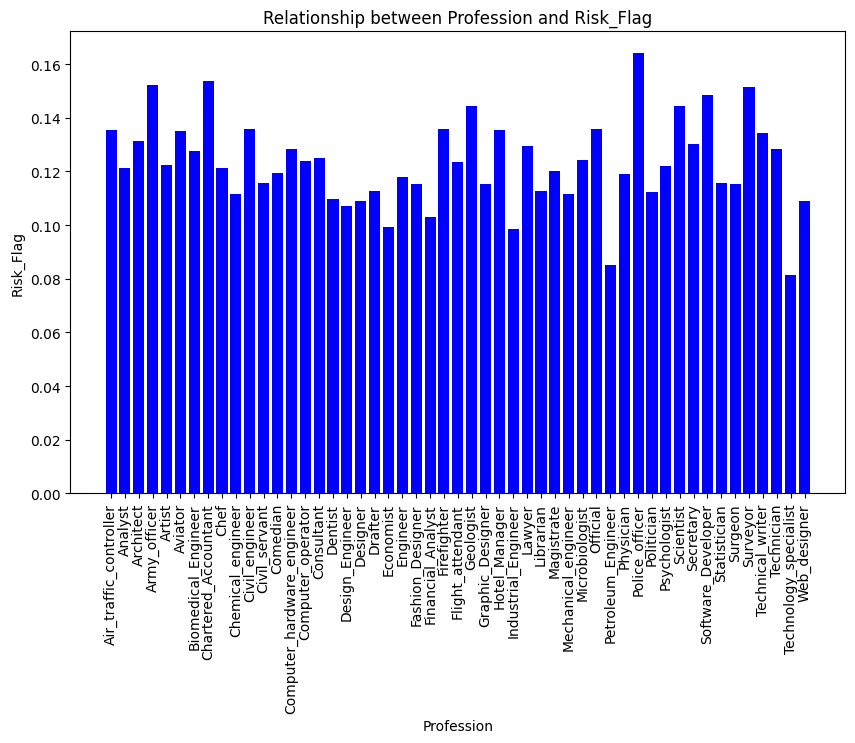

In [16]:
 bankdata = pd.read_csv('/content/CSEdata.csv')

# Create a cross-tabulation of Profession and Risk_Flag
Profession_risk_mean = bankdata.groupby('Profession')['Risk_Flag'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(Profession_risk_mean.index, Profession_risk_mean, color = 'blue') # Change color here
plt.title('Relationship between Profession and Risk_Flag')
plt.xlabel('Profession')
plt.ylabel('Risk_Flag')
plt.xticks(rotation=90)
plt.show()


According to the graph police officers are of high risk and petroleum engineers are of low risk, now lets check car ownership and current job years

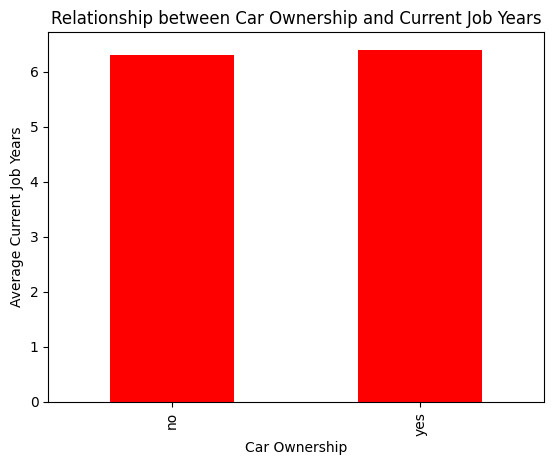

In [17]:
bankdata = pd.read_csv('/content/CSEdata.csv')
grouped = bankdata.groupby('Car_Ownership')['CURRENT_JOB_YRS'].mean()

fig, ax = plt.subplots()
colors = ['blue' if ownership == 'Yes' else 'red' for ownership in grouped.index]
grouped.plot(kind='bar', ax=ax, color=colors)
ax.set_xlabel('Car Ownership')
ax.set_ylabel('Average Current Job Years')
ax.set_title('Relationship between Car Ownership and Current Job Years')
plt.show()




According to the graph car ownership and current job years do not influence each other because people who have cars and those who do not own cars have the same current job years, there is no difference. Lets check state and riskflag

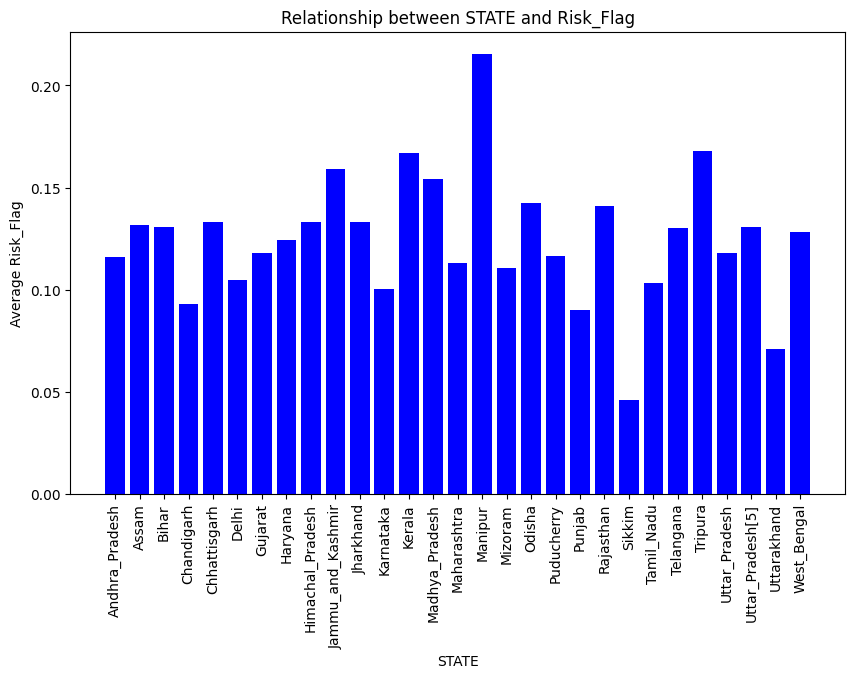

In [18]:
bankdata = pd.read_csv('/content/CSEdata.csv')

# Create a cross-tabulation of Profession and Risk_Flag
STATE_risk_mean = bankdata.groupby('STATE')['Risk_Flag'].mean()
bankdata['Risk_Flag'] = bankdata['Risk_Flag'].clip(lower=0.0, upper=1.0)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(STATE_risk_mean.index, STATE_risk_mean, color = 'blue') # Change color here
plt.title('Relationship between STATE and Risk_Flag')
plt.xlabel('STATE')
plt.ylabel('Average Risk_Flag')
plt.xticks(rotation=90)
plt.show()




From the graph above Manipur state is of high risk while Sikkim is of low risk, now lets check the correlation matrix across the features

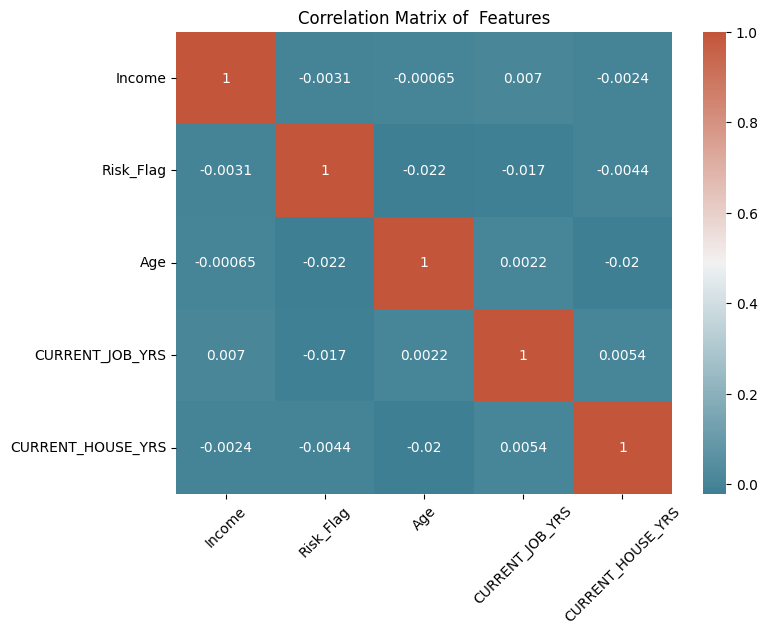

In [19]:
correlation = bankdata[['Income', 'Risk_Flag', 'Age', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']].corr()

# Create a new figure for the plot
plt.figure(figsize=(8, 6))

# Create a colormap for the heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Generate the heatmap
ax = sns.heatmap(correlation, cmap=cmap, annot=True)

# Add a title to the heatmap
plt.title("Correlation Matrix of  Features")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


In [ ]:
bankdata['Risk_Flag'] = pd.to_numeric(bankdata['Risk_Flag'])

# **Machine learning model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#convert categorial features to numeric features using one hot encoding
cat_cols = ['Profession', 'Car_Ownership','Married/Single','House_Ownership','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','STATE','CITY']
if set(cat_cols).issubset(bankdata.columns):  # Check if all columns in cat_cols exist
    bankdata = pd.get_dummies(bankdata, columns=cat_cols)
else:
    print("Warning: Some columns in cat_cols are missing from the data. Skipping one-hot encoding for those columns.")


#split the dataset into features (x) and target (y)
X = bankdata.drop('Risk_Flag', axis = 1)
y = bankdata['Risk_Flag']
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,)
#scale the numerical column using the standard scaler
scaler = StandardScaler()
numerical_cols = ['Income', 'Age', 'Experience',]
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
from sklearn.svm import SVC
model = SVC(random_state = 42)
model.fit(X_train, y_train)
#now lets make prdictions on the test set
y_pred = model.predict(X_test)
print(y_pred)


In [ ]:
bankdata = pd.DataFrame(data)

# One-hot encode categorical features
cat_cols = ['Profession', 'Car_Ownership','Married/Single','House_Ownership','STATE','CITY']
if set(cat_cols).issubset(bankdata.columns):
    bankdata = pd.get_dummies(bankdata, columns=cat_cols)
else:
    print("Warning: Some columns in cat_cols are missing from the data. Skipping one-hot encoding for those columns.")

# Split the data into features (X) and target (y)
X = bankdata.drop('Risk_Flag', axis=1)
y = bankdata['Risk_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['Income', 'Age', 'Experience']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Use Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the predictions
print(y_pred)

In [ ]:
#convert x_test to a dataframe
X_test_bankdata = pd.DataFrame(X_test, columns = X_test.columns)
#add the predicted values to X_test_df

X_test_bankdata['Risk_Flag']= y_pred
print(X_test_bankdata.head())


# **Conclusion**
To combat rising personal loan defaults affecting profitability, Alpha Dreamers Banking Consortium (ADBC) implemented a data-driven solution. This initiative leveraged Business Intelligence (BI) and machine learning techniques.

Firstly, an Exploratory Data Analysis (EDA) was conducted. Loan applicant data underwent rigorous analysis using visualization techniques to pinpoint factors linked to defaults. This phase aimed to uncover underlying patterns within the data.

Secondly, meticulous data cleaning ensured the information's suitability for machine learning model development. This involved addressing missing values, inconsistencies, and formatting issues.

Finally, a logistic regression model was built to predict the likelihood of loan defaults. This model analyzes applicant data and estimates the risk associated with each loan application. By implementing this data-driven framework, ADBC established a system for informed decision-making regarding personal loan approvals, focusing on historical data analysis and the development of a predictive model.


